In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from sklearn import datasets
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [2]:
# TODO: wczytać MNIST
digits = datasets.load_digits()

In [3]:
print("Zbiór danych składa się z", digits.data.shape[0], "instancji.")

Zbiór danych składa się z 1797 instancji.


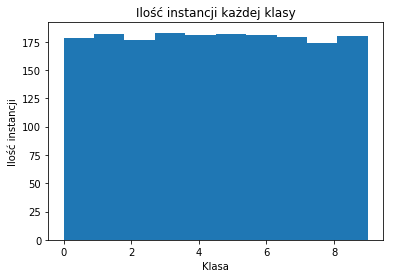

In [4]:
pyplot.title("Ilość instancji każdej klasy")
pyplot.xlabel("Klasa")
pyplot.ylabel("Ilość instancji")
pyplot.hist(digits.target, bins=len(digits.target_names))
pyplot.show()

In [5]:
print("Każda instancja posiada", digits.data.shape[1], "cech.")

Każda instancja posiada 64 cech.


In [6]:
X, y = shuffle(digits.data, digits.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [7]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)


MSE: 1.4689


Text(0, 0.5, 'Deviance')

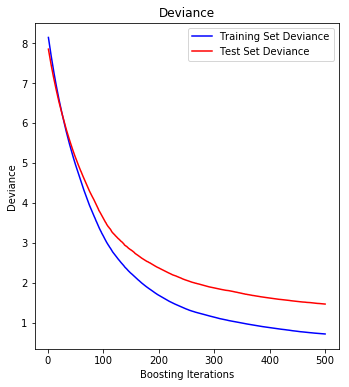

In [8]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
